## Breast Cancer Diagnosis Prediction:

The goal is to predict whether a tumor is Malignant (M) or Benign (B) based on digitized image features.This project uses Logistic Regression—a simple, interpretable model—and includes all necessary steps from data exploration to model interpretation.

## 1. Data Loading and Initial Exploration
The first step is to load the data and inspect its structure, data types, and check for missing values or anomalies.

In [1]:
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load the dataset
df = pd.read_csv('data.csv')

print("--- Initial Data Snapshot (Head) ---")
print(df.head())

print("\n--- Data Information (Info) ---")
print(df.info())

print("\n--- Descriptive Statistics (Sample) ---")
print(df[['radius_mean', 'texture_mean', 'diagnosis']].describe(include='all'))

print("\n--- Count of Missing Values per Column ---")
print(df.isnull().sum().sort_values(ascending=False).head())

print("\n--- Unique values in Target Variable 'diagnosis' ---")
print(df['diagnosis'].unique())

--- Initial Data Snapshot (Head) ---
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  pe

Initial Findings and Insights

- The dataset contains **569 entries** and **33 columns**.

- **Target Variable:** `diagnosis` (object type) has two classes:
    - `'M'` = Malignant
    - `'B'` = Benign  
  *(Suitable for binary classification)*

- **Missing Data:**
    - All relevant feature columns are **complete** (569 non-null values).
    - An empty column, `Unnamed: 32`, is **entirely null** (0 non-null values) and should be **dropped**.

- **Identifier:**
    - The `id` column is a **unique identifier** and should be **dropped before modeling**.

## 2. Data Cleaning and Preprocessing

We'll clean the data by dropping irrelevant columns, encoding the categorical target variable, and scaling the features.

In [2]:
# --- Data Cleaning: Drop unnecessary columns ---
# 'id' is an identifier, and 'Unnamed: 32' is an empty column.
df_clean = df.drop(columns=['id', 'Unnamed: 32'])

# --- Target Variable Encoding: Convert 'M' (Malignant) and 'B' (Benign) to 1 and 0 ---
# 'M' is associated with the positive class (Malignant).
df_clean['diagnosis_encoded'] = df_clean['diagnosis'].map({'M': 1, 'B': 0})
df_clean = df_clean.drop(columns=['diagnosis']) # Drop original column

# --- Separate Features (X) and Target (y) ---
X = df_clean.drop(columns=['diagnosis_encoded'])
y = df_clean['diagnosis_encoded']

# --- Split Data into Training and Testing Sets ---
# Stratify ensures the train/test split maintains the original class proportion.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- Feature Scaling (Standardization) ---
# Standardization (Z-score scaling) is crucial for distance-based and regularization-based models like Logistic Regression.
scaler = StandardScaler()

# Fit the scaler only on the training data to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)

# Transform both training and testing data
X_test_scaled = scaler.transform(X_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("\nFirst 5 rows of scaled training data (as an array):")
print(X_train_scaled[:5])

Shape of X_train_scaled: (398, 30)
Shape of X_test_scaled: (171, 30)

First 5 rows of scaled training data (as an array):
[[ 1.70581999  1.04974466  2.12129465  1.66933676  2.27645789  4.54429486
   3.53913939  2.84839268  4.03238962  2.63977264  1.88658218  1.20005314
   2.87275048  1.74921741  1.19777257  2.41558743  2.3247057   2.29784843
   6.94476933  0.82740765  1.45951037  0.94958949  1.86817555  1.3068397
   1.33538327  2.31385505  2.34642696  2.04939907  3.94428119  0.86655367]
 [ 0.53638811 -0.90994477  0.5690952   0.39031555 -0.06586788  0.64494486
   0.39354254  0.55700173 -0.11678098 -0.40152959 -0.25041371 -0.84442436
  -0.11857378 -0.16149227 -0.37614552  0.40854639  0.14771626  0.48165509
  -0.68243869 -0.23809862  0.50829368 -0.64531469  0.50191659  0.33008672
   0.47701253  1.24209126  1.05257355  1.25584994  0.16797759  0.40524244]
 [-0.13145612 -0.99333581 -0.14884823 -0.21154347 -0.91616898 -0.50857386
  -0.56752982 -0.60664497 -0.07986666 -0.51245428 -0.95807347 -

## 3. Exploratory Data Analysis (EDA) and Insights

Insight 1: Target Class Distribution

The target variable distribution reveals the balance of the dataset.

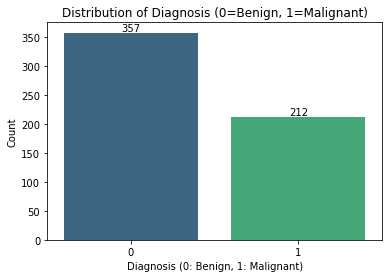

In [5]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='diagnosis_encoded', data=df_clean, palette='viridis')
plt.title('Distribution of Diagnosis (0=Benign, 1=Malignant)')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
#plt.savefig('diagnosis_distribution.png')
#plt.close()

Observation: The dataset shows a slight imbalance: 357 Benign (0) cases versus 212 Malignant (1) cases. This is a common situation, and the model must perform well on the minority class (Malignant).

Insight 2: Feature Comparison by Diagnosis

Box plots help visualize how key features differ between the two target classes.

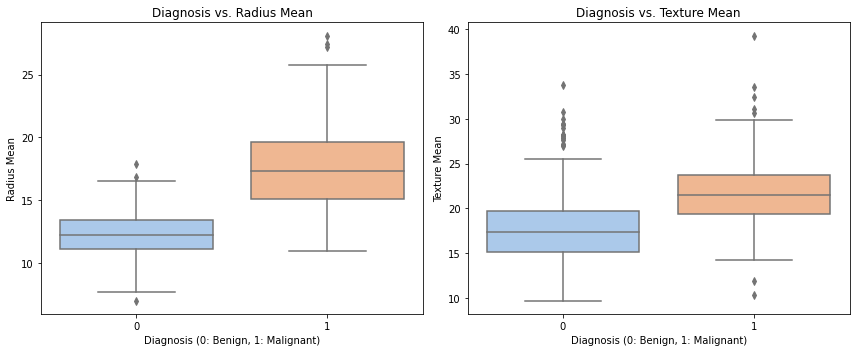

In [7]:
selected_features = ['radius_mean', 'texture_mean']
plt.figure(figsize=(12, 5))

for i, feature in enumerate(selected_features):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x='diagnosis_encoded', y=feature, data=df_clean, palette='pastel')
    plt.title(f'Diagnosis vs. {feature.replace("_", " ").title()}')
    plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
    plt.ylabel(feature.replace("_", " ").title())

plt.tight_layout()
#plt.savefig('feature_vs_diagnosis_boxplots.png')
#plt.close()

- **Observation:** `radius_mean` shows a clear separation:
    - The **median** and **interquartile range (IQR)** for **Malignant tumors** are **significantly higher** than for **Benign tumors**.
    - This feature is **highly predictive**.

- **Observation:** `texture_mean` also shows a difference:
    - However, the **overlap** between the two diagnoses is much **larger**, suggesting it is **less discriminatory** than `radius_mean`.

## 4. Model Building and Evaluation (Logistic Regression)

We choose Logistic Regression for its interpretability and its effectiveness on this linearly separable, binary classification problem.

--- Classification Report ---
               precision    recall  f1-score   support

   Benign (0)       0.96      0.99      0.98       107
Malignant (1)       0.98      0.94      0.96        64

     accuracy                           0.97       171
    macro avg       0.97      0.96      0.97       171
 weighted avg       0.97      0.97      0.97       171


--- Confusion Matrix (True vs. Predicted) ---
[[106   1]
 [  4  60]]

--- ROC AUC Score: 0.9975 ---


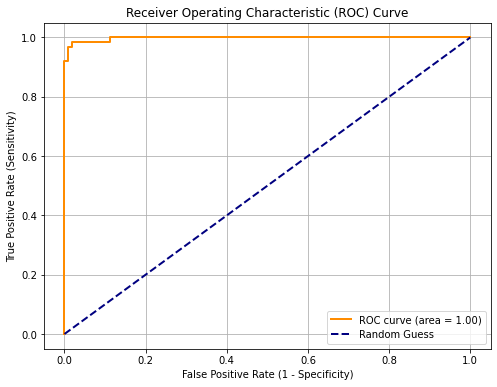

In [9]:
# --- Model Building and Training (Logistic Regression) ---
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train_scaled, y_train)

# --- Model Prediction ---
y_pred = log_reg_model.predict(X_test_scaled)
y_pred_proba = log_reg_model.predict_proba(X_test_scaled)[:, 1] # Probability of class 1 (Malignant)

# --- Model Evaluation: Classification Report and AUC ---
print("--- Classification Report ---")
report = classification_report(y_test, y_pred, target_names=['Benign (0)', 'Malignant (1)'])
print(report)

print("\n--- Confusion Matrix (True vs. Predicted) ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"\n--- ROC AUC Score: {auc:.4f} ---")

# --- Plotting the ROC Curve for Visualization ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
#plt.savefig('roc_curve.png')
#plt.close()

| **Metric**        | **Score**  | **Insight**                                                                                     |
|-------------------|------------|-------------------------------------------------------------------------------------------------|
| Accuracy          | 0.97       | Overall correct predictions are very high.                                                      |
| Malignant Recall  | 0.94       | Of all actual Malignant cases, 94% were correctly identified. This is critical, as missing a Malignant case (False Negative) is a severe error. |
| Malignant Precision | 0.98     | When the model predicts Malignant, it is correct 98% of the time.                               |
| ROC AUC Score     | 0.9975     | A near-perfect score, indicating the model is highly capable of distinguishing between the two classes. |

True Negatives (TN): 106 Benign cases correctly predicted.

False Positives (FP): 1 Benign case incorrectly predicted as Malignant.

False Negatives (FN): 4 Malignant cases incorrectly predicted as Benign.
Area for Improvement (though very small).

True Positives (TP): 60 Malignant cases correctly predicted.

## 5. Model Interpretation: Feature Importance

For Logistic Regression, the coefficients of the standardized features represent their predictive strength and direction. A larger positive coefficient means a feature's increase makes the tumor more likely to be Malignant.


--- Top 10 Most Influential Features (Absolute Coefficient Value) ---
| Feature             |   Coefficient |
|:--------------------|--------------:|
| texture_worst       |      1.374    |
| radius_se           |      1.21432  |
| symmetry_worst      |      1.0772   |
| area_se             |      0.941225 |
| compactness_se      |     -0.913868 |
| area_worst          |      0.908859 |
| concave points_mean |      0.859029 |
| radius_worst        |      0.844973 |
| concavity_worst     |      0.831026 |
| concavity_mean      |      0.822359 |


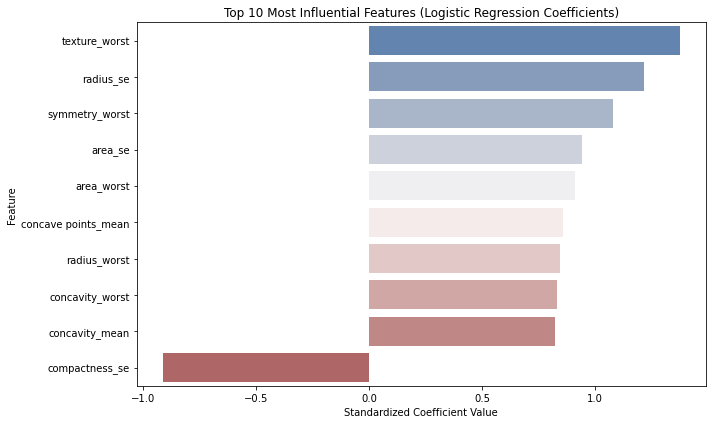

In [11]:
# Create a DataFrame for easy coefficient viewing
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Select top 10 most influential features (based on absolute coefficient value)
coefficients['Absolute_Coefficient'] = np.abs(coefficients['Coefficient'])
top_10_abs_coeff = coefficients.sort_values(by='Absolute_Coefficient', ascending=False).head(10)

print("\n--- Top 10 Most Influential Features (Absolute Coefficient Value) ---")
print(top_10_abs_coeff[['Feature', 'Coefficient']].to_markdown(index=False))

# --- Plot Feature Coefficients ---
plt.figure(figsize=(10, 6))
# Sort by coefficient value for visual comparison of magnitude and sign
sns.barplot(x='Coefficient', y='Feature', data=top_10_abs_coeff.sort_values(by='Coefficient', ascending=False), palette='vlag')
plt.title('Top 10 Most Influential Features (Logistic Regression Coefficients)')
plt.xlabel('Standardized Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
#plt.savefig('feature_coefficients.png')
#plt.close()

## Feature Importance Analysis

| **Feature**         | **Coefficient** | **Interpretation**                                                                                                             |
|---------------------|-----------------|--------------------------------------------------------------------------------------------------------------------------------|
| texture_worst       | 1.374           | This is the strongest predictor. A one standard deviation increase in worst (largest) tumor texture increases the log-odds of the tumor being Malignant by 1.374. |
| radius_se           | 1.214           | The Standard Error (SE) of the radius (variation in tumor size) is a critical indicator. Higher variation strongly predicts Malignancy. |
| symmetry_worst      | 1.077           | The worst (largest) tumor symmetry is highly predictive, suggesting a higher degree of irregularity in the final stage of the tumor's boundary. |
| compactness_se      | −0.914          | This is the strongest negative predictor. A one standard deviation increase in the Standard Error of compactness makes the tumor less likely to be Malignant. |

The analysis confirms that features representing the size ($\text{radius}$), texture, and irregularity ($\text{symmetry, concave points}$) of the tumor, particularly in the standard error ($\text{se}$) and worst ($\text{worst}$) phases, are the most influential factors in determining a Malignant diagnosis.